# Boston Housing price regression

Predicting Boston Housing prices based on 13 features 

In [1]:
from matplotlib import pyplot
import pandas as pd
import seaborn as sns

from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras import layers

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

def evaluate(testY, predY):
    pyplot.plot(testY, testY, 'r')
    pyplot.scatter(testY, predY)
    pyplot.title('Median value in $1000');
    pyplot.xlabel('Actual')
    pyplot.ylabel('Predicted')
    pyplot.show()

    print()
    print("MSE:", metrics.mean_squared_error(testY, predY))
    print("MAE:", metrics.mean_absolute_error(testY, predY))
    print("R2:", metrics.r2_score(testY, predY))

## Data loading

In [2]:
(initTrainX, initTrainY), (initTestX, initTestY) = datasets.boston_housing.load_data()

In [3]:
columns = [
    'Crime Rate', 'Residential Land Zones', 'Non-retail Business Acres',
    'Charles River tract bounds', 'N.O. Concentration', '# of Rooms', 'Age',
    'Distance to Employment', 'Highway Accessibility', 'Property Tax Rate',
    'Pupil Teacher Ratio', 'B', '% Lower Income'
]
df = pd.DataFrame(initTrainX, columns=columns)
df['Median value in $1000'] = initTrainY

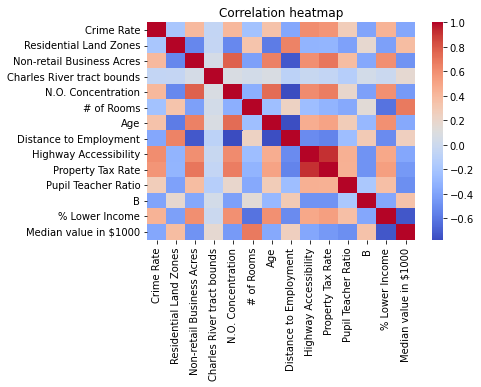

In [4]:
sns.heatmap(df.corr(), cmap='coolwarm')
pyplot.title('Correlation heatmap')
pyplot.show()

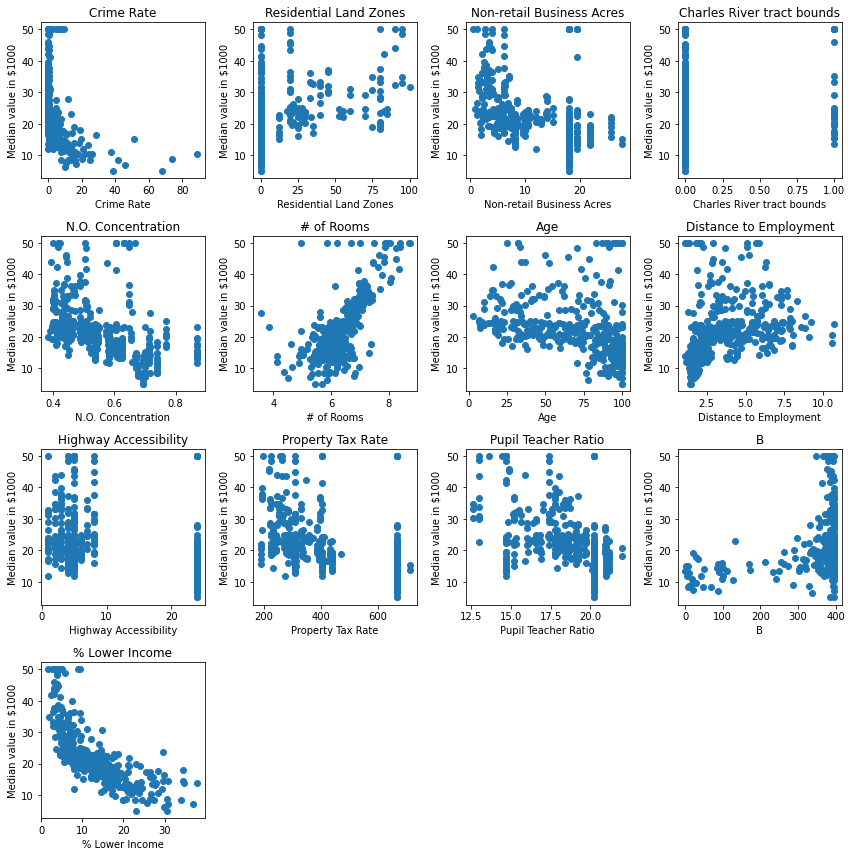

In [5]:
fig = pyplot.figure(figsize=(12, 12))

for i, col in enumerate(df.columns):
    if col != 'Median value in $1000':
        ax = fig.add_subplot(4, 4, i + 1)
        ax.set_ylabel('Median value in $1000')
        ax.set_xlabel(col)
        ax.set_title(col)
        ax.scatter(df[col], df['Median value in $1000'])

pyplot.tight_layout()
pyplot.show()

In [6]:
print('features:', initTrainX.shape[1])
print('trainX length:', initTrainX.shape[0])
print('testX length:', initTestX.shape[0])

features: 13
trainX length: 404
testX length: 102


## Preprocessing

In [7]:
mean = initTrainX.mean(axis=0)
std = initTrainX.std(axis=0)
trainX = (initTrainX - mean) / std
testX = (initTestX - mean) / std
trainY = initTrainY
testY = initTestY

## Neural Network

In [8]:
FEATURES_COUNT = 13

def build_NN_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(FEATURES_COUNT,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [9]:
NN_model = build_NN_model()
NN_history = NN_model.fit(trainX, trainY, epochs=50, batch_size=8, validation_data=(testX, testY), verbose=0)

### Learning history

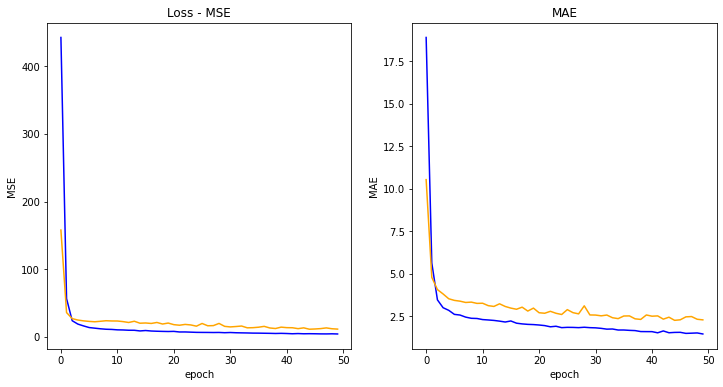

In [10]:
fig = pyplot.figure(figsize=(12,6))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Loss - MSE')
ax.set_xlabel('epoch')
ax.set_ylabel('MSE')
ax.plot(NN_history.history['loss'], color='blue', label='train')
ax.plot(NN_history.history['val_loss'], color='orange', label='test')

ax = fig.add_subplot(1, 2, 2)
ax.set_title('MAE')
ax.set_xlabel('epoch')
ax.set_ylabel('MAE')
ax.plot(NN_history.history['mae'], color='blue', label='train')
ax.plot(NN_history.history['val_mae'], color='orange', label='test')

pyplot.show()

### Evaluation

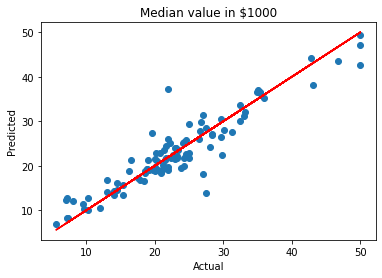


MSE: 11.267932540716059
MAE: 2.2844524215249455
R2: 0.8646394569559587


In [11]:
NN_predY = NN_model.predict(testX)
evaluate(testY, NN_predY)

## Random Forest Regressor

In [12]:
RF_model = RandomForestRegressor(n_estimators=100)
RF_model.fit(trainX, trainY);

### Evaluation

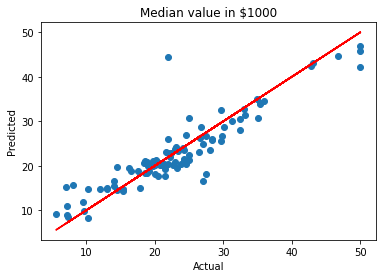


MSE: 13.937649019607841
MAE: 2.4253921568627446
R2: 0.8325684207609325


In [13]:
RF_predY = RF_model.predict(testX)
evaluate(testY, RF_predY)